<a href="https://colab.research.google.com/github/Israel-San-Agustin/METODOS-NUMERICOS-/blob/main/Polinomio_Interpolante_de_Lagrange_con_Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $Polinomio$ $de$ $interpolación$ $de$ $Lagrange.$


In [22]:
# Importar las bibliotecas necesarias
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def tabla_lagrange(data):

    x_vals, y_vals = zip(*data)
    n = len(x_vals)
    x = sp.symbols('x')
    L_terms = []

    for i in range(n):
        term = y_vals[i]
        L_i = 1
        for j in range(n):
            if i != j:
                L_i *= (x - x_vals[j]) / (x_vals[i] - x_vals[j])
        L_terms.append(sp.simplify(L_i * term))

    return L_terms

In [26]:
def construir_polinomio(L_terms):

    x = sp.symbols('x')
    return sp.simplify(sum(L_terms))

In [27]:

def evaluar_polinomio(polinomio, valor_x):

    x = sp.symbols('x')
    return float(polinomio.subs(x, valor_x))

In [28]:
def imprimir_tabla_lagrange(data, L_terms):

    print("Tabla de términos de Lagrange:")
    for i, (xi, yi) in enumerate(data):
        print(f"L_{i}(x): {L_terms[i]}")
    print()

def plot_polinomio(data, polinomio):

    x_vals, y_vals = zip(*data)
    x = sp.symbols('x')
    f = sp.lambdify(x, polinomio, modules=["numpy"])

    # Generar puntos para graficar
    x_plot = np.linspace(min(x_vals) - 1, max(x_vals) + 1, 500)
    y_plot = f(x_plot)

    # Graficar
    plt.figure(figsize=(8, 6))
    plt.plot(x_plot, y_plot, label=f"Polinomio: {sp.expand(polinomio)}", color='blue')
    plt.scatter(x_vals, y_vals, color='red', label='Datos originales')
    plt.title("Interpolación de Lagrange")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
    plt.legend()
    plt.grid()
    plt.show()



Tabla de términos de Lagrange:
L_0(x): (x - 5)*(x - 4)*(x - 3)*(x - 2)*(x - 1)/24
L_1(x): x*(x - 5)*(x - 4)*(x - 3)*(x - 2)/24
L_2(x): -3*x*(x - 5)*(x - 4)*(x - 3)*(x - 1)/4
L_3(x): 25*x*(x - 5)*(x - 4)*(x - 2)*(x - 1)/12
L_4(x): -55*x*(x - 5)*(x - 3)*(x - 2)*(x - 1)/24
L_5(x): 7*x*(x - 4)*(x - 3)*(x - 2)*(x - 1)/8

Polinomio de Lagrange:
x**3 - 2*x**2 + 7*x - 5

El polinomio de Lagrange evaluado en x = 3 es: 25.000000


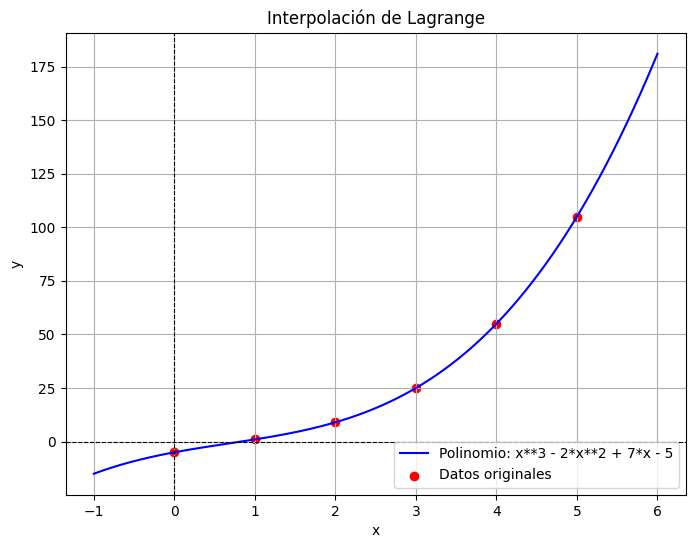

In [29]:
# Ejemplo de uso
if __name__ == "__main__":
    # Cambiar la tabla de datos según sea necesario
    data = [(0, -5), (1, 1), (2, 9), (3, 25), (4, 55), (5, 105)]

    # Calcular los términos de Lagrange
    L_terms = tabla_lagrange(data)

    # Imprimir la tabla
    imprimir_tabla_lagrange(data, L_terms)

    # Construir el polinomio
    polinomio = construir_polinomio(L_terms)
    print(f"Polinomio de Lagrange:\n{polinomio}\n")

    # Cambiar el valor de x a evaluar según sea necesario
    valor_x = 3
    resultado = evaluar_polinomio(polinomio, valor_x)
    print(f"El polinomio de Lagrange evaluado en x = {valor_x} es: {resultado:.6f}")

    # Graficar el polinomio
    plot_polinomio(data, polinomio)
